# Prática Filtragem Espacial II

**Aluno:** Euler Gomes da Rocha

Bibliotecas

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Carregando a imagem RGB

(225, 225, 3)


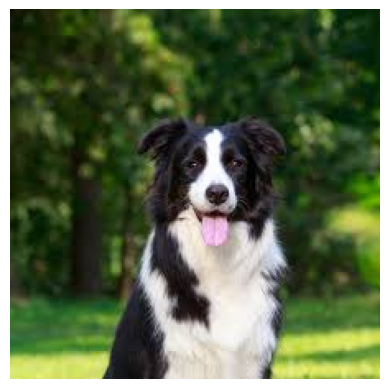

In [102]:
color_img = cv2.imread('border_collie.jpg', cv2.IMREAD_COLOR)
color_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
print(color_img.shape)

plt.figure()
plt.imshow(color_rgb)
plt.axis('off')
plt.show()

## Processamento da imagem com os filtros

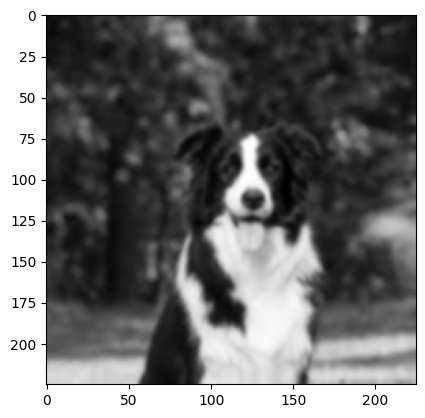

In [103]:
#converter a imagem para gray scale
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
#tirando ruido
gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

plt.figure()
plt.imshow(gray_img, cmap='gray') #exibir tons de cinza cmap ='gray'
plt.show()

### Aplicação dos Operadores de Primeira Ordem

In [104]:
#operador SOBEL
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
#cv2.CV_64F evita overflow

#SOBEL combinado
sobel_com = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_result = cv2.normalize(sobel_com, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

In [105]:
#operador PREWITT
kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
kernel_prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

prewitt_x = cv2.filter2D(gray_img, cv2.CV_64F, kernel_prewitt_x)
prewitt_y = cv2.filter2D(gray_img, cv2.CV_64F, kernel_prewitt_y)

#PREWITT combinado
prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)
prewitt_result = cv2.normalize(prewitt_combined, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)



### Aplicação do Operador de Segunda Ordem

In [106]:
#Operador LAPLACIANO

laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)

laplacian_result = cv2.normalize(laplacian,None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

## Mostrando a imagem

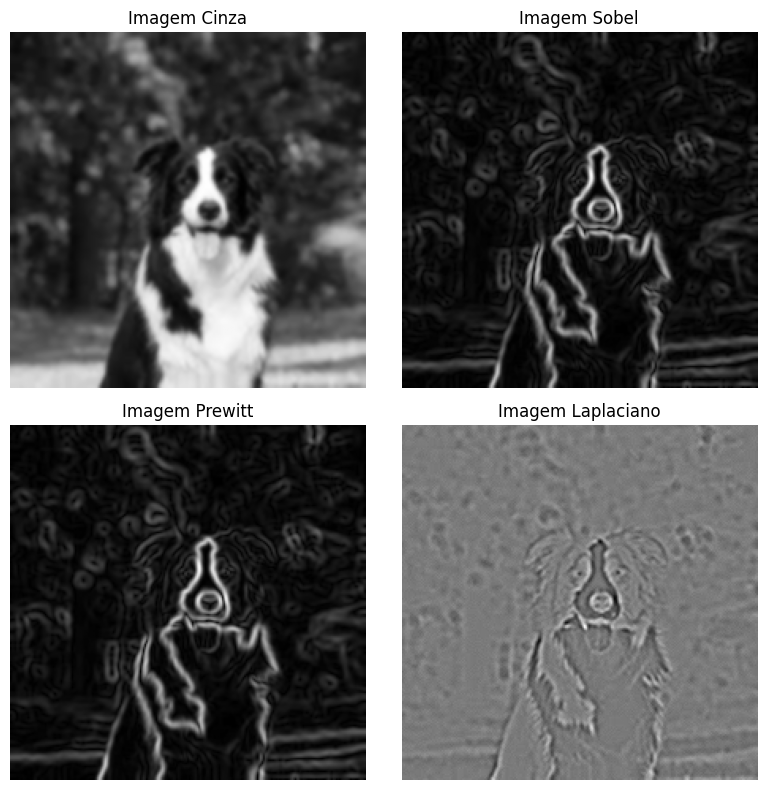

In [110]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Imagem Cinza')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title('Imagem Sobel')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(prewitt_result, cmap='gray')
plt.title('Imagem Prewitt')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_result, cmap='gray')
plt.title('Imagem Laplaciano')
plt.axis('off')

plt.tight_layout()
plt.show()


## Resultados

Sobel e Prewitt obtiveram um resultado bem parecido (até pela propria imagem acima).
Produziram bordas mais grossas e mais visiveis.
A quantidade de ruído apresentada também foi bem parecida, mas no Sobel aparenta ser mais suave (mesmo aplicando um filtro Gaussiano antes de aplicar os filtros).

Para o Laplaciano, as bordas detectadas foram mais finas e menos perceptiveis.
Outro detalhe mantido no Laplaciano foram os detalhes menores como os pelos do cachorro e algumas partes do fundo (como a grama e algumas folhagens).
Quanto ao ruído, o laplaciano foi mais sucetivel, o fundo desfocado da imagem ficou somente varios borrões sem forma definida.

Em resumo, Sobel e Prewitt foram muito bons para detectar bordas mais grossas em meio a muito ruído, já o Laplaciano preservou mais detalhes mas é visivelmente mais sucetivel a ruído.
